### About the data set (Heart disease data)

The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile. <br> Attribute information:

**male:** Gender of patient: male(1) or female(0)

**age:** Age of patient

**education:** Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

**currentSmoker:** Whether the patient is a smoker now: Yes(1) or No(0)

**cigsPerDay:** Average number of cigarettes smoked by patient per day

**BPMeds:** Whether the patient is on blood pressure medications: Yes(1) or No(0)

**prevalentStroke:** If the patient has a history of heart stroke: Yes(1) or No(0)

**prevalentHyp:** If the patient has a history of hypertension: Yes(1) or No(0)

**diabetes:**  If the patient has a diabetes: Yes(1) or No(0)

**totChol:** Average cholesterol levels in mg/dL

**sysBP:** Average systolic blood pressure of patient

**diaBP:** Average diastolic blood pressure of patient

**BMI:** BMI of patient

**heartRate:** Avergae heartrate of patient

**glucose:** Average blood glucose levels of patient

**CVD:** Does the patient have cardiovascular disease: Yes(1) or No(0)

## Table of Content

1. **[Logistic Regression Model](#logreg)**
2. **[Model Evaluation Metrics](#mod_eval)**
3. **[Performance Evaluation Metrics](#perf_eval)**
4. **[Determining optimal threshold](#opt)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/heart_d.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.shape

(4240, 16)

In [ ]:
df['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [ ]:
df['education'] = df['education'].fillna(1)

In [ ]:
df['education'].value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [ ]:
df['cigsPerDay'].value_counts()

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [ ]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(0.0)

In [ ]:
df['cigsPerDay'].value_counts()[0]

2174

In [ ]:
df['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [ ]:
df['BPMeds'] = df['BPMeds'].fillna(0.0)

In [ ]:
df['BPMeds'].value_counts()

0.0    4116
1.0     124
Name: BPMeds, dtype: int64

In [ ]:
df['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
392.0     1
405.0     1
359.0     1
398.0     1
119.0     1
Name: totChol, Length: 248, dtype: int64

<Axes: >

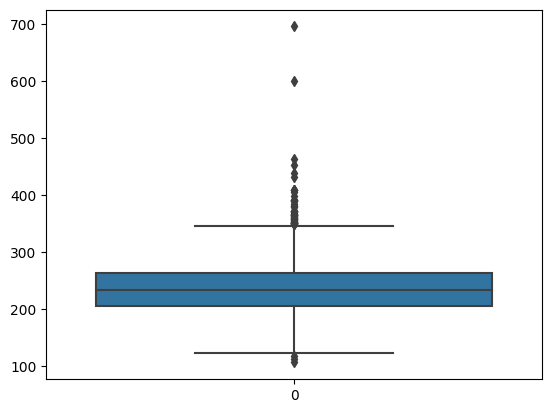

In [ ]:
sns.boxplot(df['totChol'])

In [ ]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [ ]:
df['totChol'].isnull().sum()

0

In [ ]:
df['BMI'].value_counts()

22.91    18
23.48    18
22.54    18
22.19    18
25.09    16
         ..
29.14     1
38.43     1
42.15     1
28.10     1
20.91     1
Name: BMI, Length: 1364, dtype: int64

<Axes: >

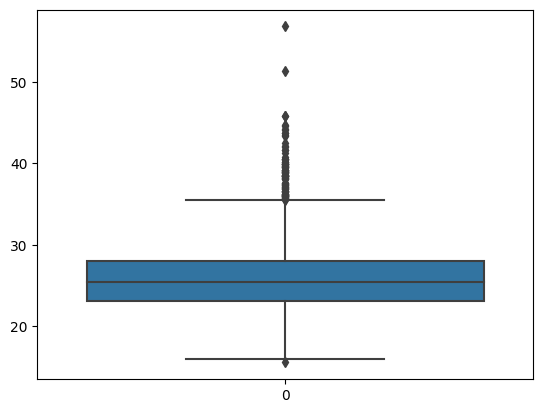

In [ ]:
sns.boxplot(df['BMI'])

In [ ]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [ ]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
df['heartRate'].isnull().sum()

0

<Axes: >

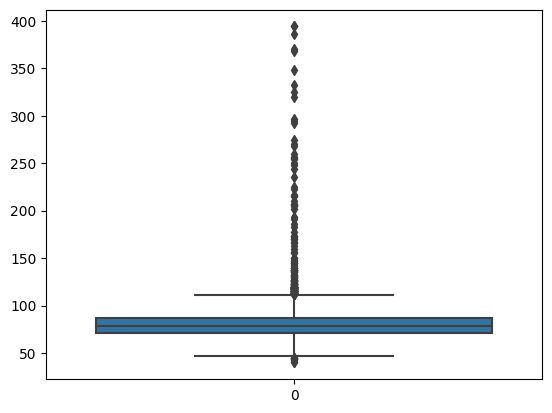

In [ ]:
sns.boxplot(df['glucose'])

In [ ]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [ ]:
df['glucose'].isnull().sum()

0

In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [ ]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
CVD                  int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels
import statsmodels.api as sm
X = df.drop('CVD', axis=1)
y = df['CVD']
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
X = sm.add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=42)

In [ ]:
X.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,1.153113,-1.234283,2.007862,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287
1,1.0,-0.867217,-0.417664,0.044002,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036
2,1.0,1.153113,-0.184345,-0.937929,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530
3,1.0,-0.867217,1.332233,1.025932,1.011863,1.768882,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188
4,1.0,-0.867217,-0.417664,1.025932,1.011863,1.180813,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705


In [ ]:
X.shape

(4240, 16)

In [ ]:
y.shape

(4240,)

In [ ]:
X_train.shape

(2968, 16)

In [ ]:
X_test.shape

(1272, 16)

In [ ]:
y_train.shape

(2968,)

In [ ]:
y_test.shape

(1272,)

#Logistic regression model

In [ ]:
logreg = sm.Logit(y_train,X_train).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.376933
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    CVD   No. Observations:                 2968
Model:                          Logit   Df Residuals:                     2952
Method:                           MLE   Df Model:                           15
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  0.1129
Time:                        11:48:01   Log-Likelihood:                -1118.7
converged:                       True   LL-Null:                       -1261.2
Covariance Type:            nonrobust   LLR p-value:                 7.727e-52
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.9856      0.063    -31.604      0.000      -2.109      -1.862
male                0.1583      0.060      2.643      0.008       0.041       0.276
age                 0.5794      0.065      8.959      0.000       0.453       0.706
education           0.0181      0.056      0.323      0.747      -0.092       0.128
currentSmoker      -0.0528      0.086     -0.615      0.539      -0.221       0.116
cigsPerDay          0.3183      0.081      3.910      0.000       0.159       0.478
BPMeds              0.0237      0.045      0.532      0.595      -0.064       0.111
prevalentStroke     0.1015      0.041      2.458      0.014       0.021       0.182
prevalentHyp        0.1187      0.071      1.678      0.093      -0.020       0.257
diabetes           -0.0125      0.057     -0.218      0.827      -0.124       0.100
totChol             0.0197      0.057      0.345      0.730      -0.092       0.132
sysBP               0.2761      0.093      2.968      0.003       0.094       0.458
diaBP               0.0371      0.084      0.442      0.659      -0.128       0.202
BMI                 0.0291      0.057      0.514      0.608      -0.082       0.140
heartRate          -0.0645      0.056     -1.150      0.250      -0.174       0.045
glucose             0.1734      0.062      2.800      0.005       0.052       0.295
===================================================================================
"""

In [ ]:
# Pesudo R2 ----> Macfadden's r-square ----> .1129 (Model Evaluation Matrix)


In [ ]:
logreg.pvalues <.05

const               True
male                True
age                 True
education          False
currentSmoker      False
cigsPerDay          True
BPMeds             False
prevalentStroke     True
prevalentHyp       False
diabetes           False
totChol            False
sysBP               True
diaBP              False
BMI                False
heartRate          False
glucose             True
dtype: bool

In [ ]:
### male , age


In [ ]:
logreg.params    # coefficient

const             -1.985599
male               0.158321
age                0.579397
education          0.018129
currentSmoker     -0.052824
cigsPerDay         0.318323
BPMeds             0.023696
prevalentStroke    0.101486
prevalentHyp       0.118727
diabetes          -0.012475
totChol            0.019718
sysBP              0.276119
diaBP              0.037142
BMI                0.029117
heartRate         -0.064506
glucose            0.173401
dtype: float64

In [ ]:
# odds of chances of cvd increses by e^o.57 per unit increase in age.


In [ ]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

1350    0.079411
1434    0.113987
2500    0.108026
1128    0.440169
4144    0.191143
dtype: float64

In [ ]:
y_pred = [1 if i >.5 else 0 for i in y_pred_prob]
y_pred[0:5]

[0, 0, 0, 0, 0]

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
mat

array([[1067,   10],
       [ 174,   21]])

Text(50.722222222222214, 0.5, 'Actual')

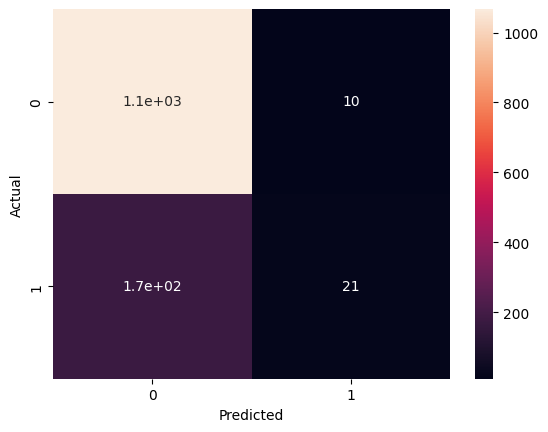

In [ ]:
sns.heatmap(mat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
true_neg = mat[0][0]          # actual and predicted both are zero
false_posi = mat[0][1]        # actual zero and predicted one
false_neg = mat[1][0]         # actual one and false zero
true_posi = mat[1][1]         # actual one and predicted one
print(true_neg,false_posi,false_neg,true_posi)

1067 10 174 21


In [ ]:
Precision = true_posi/(true_posi+false_posi)
print('Precision',Precision)

Precision 0.6774193548387096


In [ ]:
Recall = true_posi/(true_posi+false_neg)
print('Recall',Recall)

Recall 0.1076923076923077


In [ ]:
# F1_score    # more F1_score the model is good
import statistics
statistics.harmonic_mean([Precision,Recall])

0.18584070796460178

In [ ]:
from sklearn.metrics import log_loss   # log loss should be minimum for a good model
a = log_loss(y_test,y_pred)
a

5.213861811004368

In [ ]:
# correct thresold value  # true positive rate tpr false positive rate fpr
from sklearn.metrics import roc_curve
fpr , tpr ,thresold = roc_curve(y_test,y_pred_prob)
youdens_table = pd.DataFrame({'TPR':tpr,'FPR':fpr,'Thresold':thresold})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference',ascending=False).reset_index()
youdens_table.head()

,index,TPR,FPR,Thresold,Difference
0,174,0.589744,0.269266,0.173759,0.320477
1,178,0.605128,0.285980,0.166769,0.319149
2,172,0.584615,0.267409,0.174524,0.317206
3,173,0.584615,0.269266,0.173790,0.315349
4,180,0.610256,0.297122,0.163947,0.313135
